In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
df = pd.read_csv("C:/Users/prath/Downloads/economic_index.csv")

In [3]:
df

Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
0            0  2017     12           2.75                5.3         1464
1            1  2017     11           2.50                5.3         1394
2            2  2017     10           2.50                5.3         1357
3            3  2017      9           2.50                5.3         1293
4            4  2017      8           2.50                5.4         1256
5            5  2017      7           2.50                5.6         1254
6            6  2017      6           2.50                5.5         1234
7            7  2017      5           2.25                5.5         1195
8            8  2017      4           2.25                5.5         1159
9            9  2017      3           2.25                5.6         1167
10          10  2017      2           2.00                5.7         1130
11          11  2017      1           2.00                5.9         1075
12          12  2016     12           2.00                6.0         1047
13          13  2016     11           1.75                5.9          965
14          14  2016     10           1.75                5.8          943
15          15  2016      9           1.75                6.1          958
16          16  2016      8           1.75                6.2          971
17          17  2016      7           1.75                6.1          949
18          18  2016      6           1.75                6.1          884
19          19  2016      5           1.75                6.1          866
20          20  2016      4           1.75                5.9          876
21          21  2016      3           1.75                6.2          822
22          22  2016      2           1.75                6.2          704
23          23  2016      1           1.75                6.1          719

In [4]:
## drop unnecessary colm
df.drop(columns=['Unnamed: 0','year','month'],axis = 1,inplace=True)

In [5]:
df

interest_rate  unemployment_rate  index_price
0            2.75                5.3         1464
1            2.50                5.3         1394
2            2.50                5.3         1357
3            2.50                5.3         1293
4            2.50                5.4         1256
5            2.50                5.6         1254
6            2.50                5.5         1234
7            2.25                5.5         1195
8            2.25                5.5         1159
9            2.25                5.6         1167
10           2.00                5.7         1130
11           2.00                5.9         1075
12           2.00                6.0         1047
13           1.75                5.9          965
14           1.75                5.8          943
15           1.75                6.1          958
16           1.75                6.2          971
17           1.75                6.1          949
18           1.75                6.1          884
19           1.75                6.1          866
20           1.75                5.9          876
21           1.75                6.2          822
22           1.75                6.2          704
23           1.75                6.1          719

In [6]:
df.head()

interest_rate  unemployment_rate  index_price
0           2.75                5.3         1464
1           2.50                5.3         1394
2           2.50                5.3         1357
3           2.50                5.3         1293
4           2.50                5.4         1256

In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

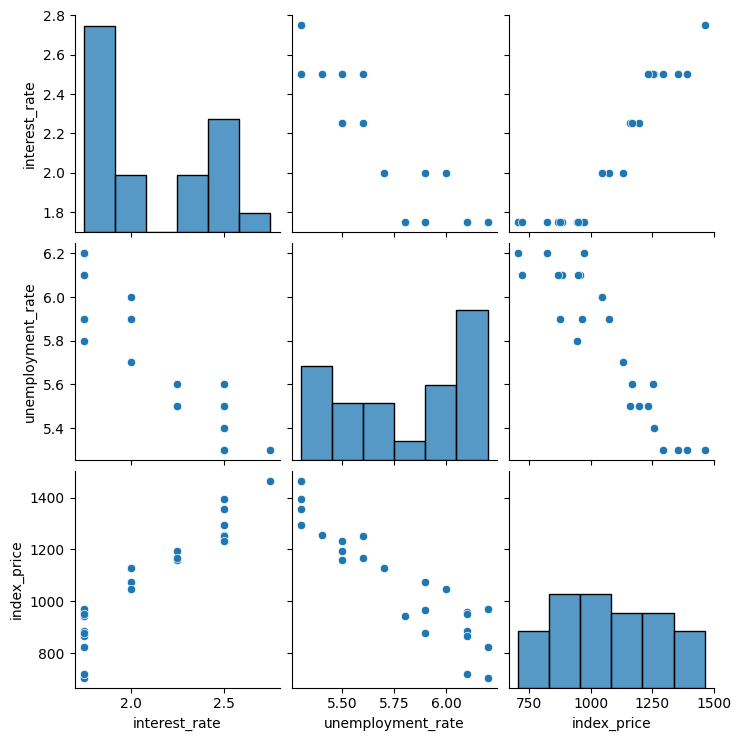

In [8]:
## visulization
sns.pairplot(df)

In [9]:
df.corr()

interest_rate  unemployment_rate  index_price
interest_rate           1.000000          -0.925814     0.935793
unemployment_rate      -0.925814           1.000000    -0.922338
index_price             0.935793          -0.922338     1.000000

Text(0, 0.5, 'Unemployment')

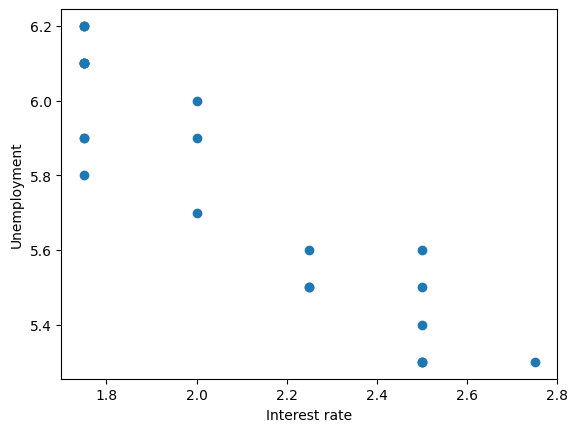

In [10]:
plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel("Interest rate")
plt.ylabel("Unemployment")

In [11]:
## independent
x= df.iloc[:,:-1]

In [12]:
x

interest_rate  unemployment_rate
0            2.75                5.3
1            2.50                5.3
2            2.50                5.3
3            2.50                5.3
4            2.50                5.4
5            2.50                5.6
6            2.50                5.5
7            2.25                5.5
8            2.25                5.5
9            2.25                5.6
10           2.00                5.7
11           2.00                5.9
12           2.00                6.0
13           1.75                5.9
14           1.75                5.8
15           1.75                6.1
16           1.75                6.2
17           1.75                6.1
18           1.75                6.1
19           1.75                6.1
20           1.75                5.9
21           1.75                6.2
22           1.75                6.2
23           1.75                6.1

In [13]:
y = df.iloc[:,-1]

In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8 ,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

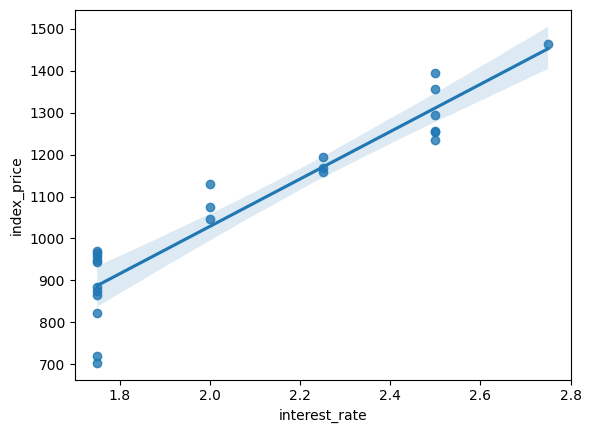

In [26]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
x_test

array([[ 0.55339859, -0.84858687],
       [-0.9486833 ,  1.36439457],
       [ 2.05548048, -1.48086727],
       [-0.9486833 ,  1.04825436],
       [-0.19764235,  0.41597395]])

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model

LinearRegression()

In [49]:
model.coef_

array([  86.63351334, -114.04857249])

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score
cs = cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv = 3)

In [35]:
import numpy as np
np.mean(cs)                 ### mean of cross validation score for cv = 3

np.float64(-5674.031667186762)

In [36]:
y_pred = model.predict(x_test)

In [37]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [38]:
## performance Metrices

from sklearn.metrics import mean_squared_error,mean_absolute_error
mae =mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


6957.105303258833
71.71878409976625
83.40926389351985


In [39]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)

In [40]:
r2

0.8254940547158576

In [41]:
## Adjusted R2-Score

adj = 1- (1-r2)*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

In [42]:
adj

0.6509881094317151

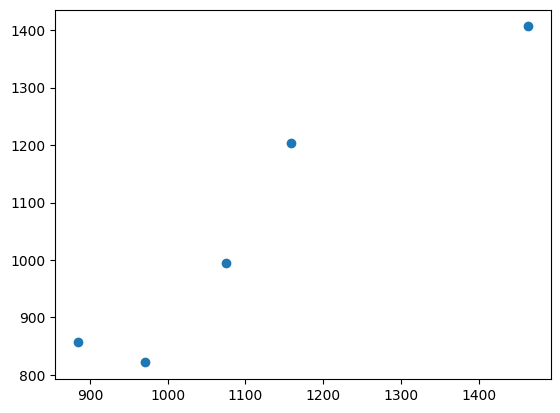

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
residuals = y_test - y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


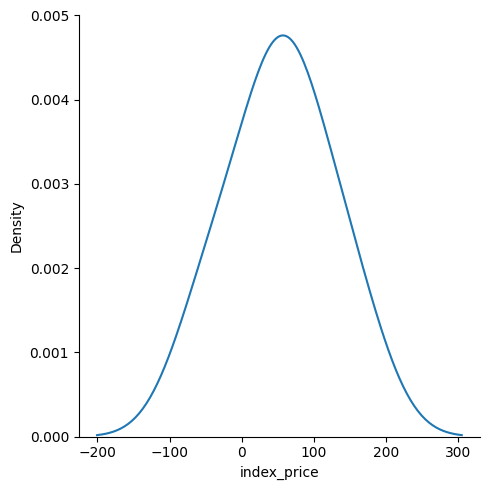

In [45]:
sns.displot(residuals,kind ='kde')

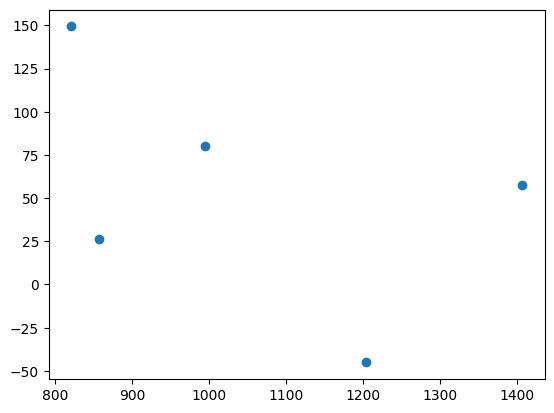

In [46]:
## Scatter plot
plt.scatter(y_pred,residuals)

In [47]:
import statsmodels.api as sm
m1 = sm.OLS(y_train,x_train).fit()

In [48]:
m1.summary()

C:\Users\prath\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Fri, 13 Jun 2025   Prob (F-statistic):                       0.751
Time:                        14:48:13   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""